In [1]:
%matplotlib inline
import os
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
aisles_df=pd.read_csv('aisles.csv')
departments_df =pd.read_csv('departments.csv')
orders_df =pd.read_csv('orders.csv')
products_df =pd.read_csv('products.csv')
orders_products_prior_df =pd.read_csv('order_products__prior.csv')
orders_products_train_df=pd.read_csv('order_products__train.csv')

In [3]:
orders_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
orders_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df]) 
order_products_total_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
reordered_df = pd.DataFrame([['Reordered', 1], ['Not-Reordered', 0]], columns = ['is_reordred','reordered'])
order_products_total_df = pd.merge(order_products_total_df, reordered_df, on='reordered')
order_products_total_df.groupby('is_reordred').size().reset_index().rename(columns={0:'Number Of products'})

,is_reordred,Number Of products
0,Not-Reordered,13863746
1,Reordered,19955360


In [7]:
orders_products_train_df.groupby('reordered').size().reset_index().rename(columns={0:'Number Of products'})

,reordered,Number Of products
0,0,555793
1,1,828824


(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 <a list of 10 Text yticklabel objects>)

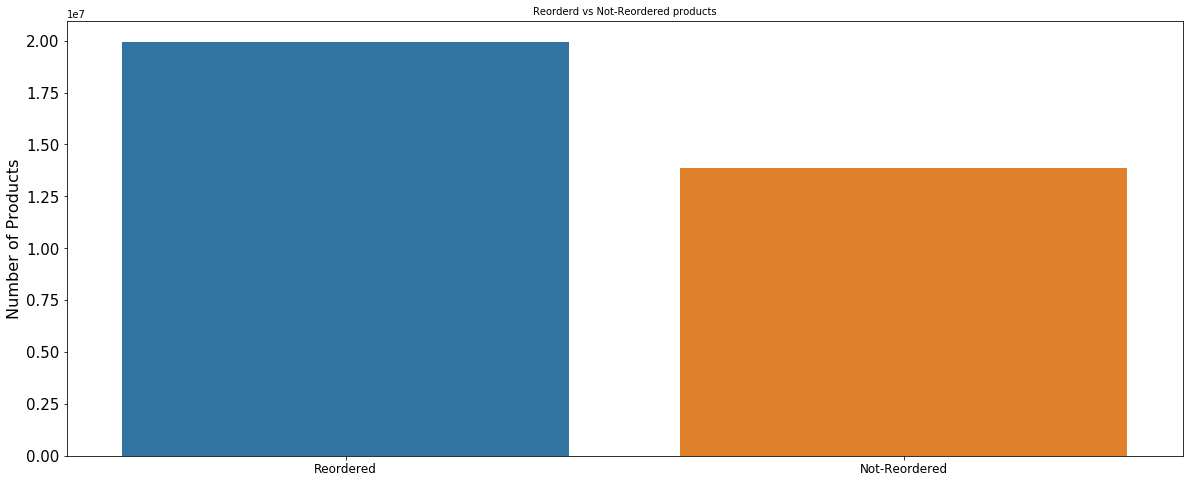

In [8]:
plt.figure(figsize=(20,8))
sns.countplot(x=order_products_total_df.is_reordred)

plt.title("Reorderd vs Not-Reordered products", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Products', fontsize=16)
plt.yticks(fontsize=15)

let's see what products are most reordered. but First need first to merge the products dataframe with order_products dataframe to get the product names

In [9]:
order_products_total_df = pd.merge(order_products_total_df, products_df, on='product_id')

In [10]:
order_products_total_df[(order_products_total_df.product_name == 'Banana')][order_products_total_df.reordered ==0].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


order_id             76125
product_id           76125
add_to_cart_order    76125
reordered            76125
is_reordred          76125
product_name         76125
aisle_id             76125
department_id        76125
dtype: int64

In [ ]:
products_order_freq = order_products_total_df.groupby(['product_name','department_id', 'aisle_id']).size().reset_index().rename(columns={0:'order_count'})
products_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)

In [ ]:
#Top most ordered products are produce
products_order_freq.head(10)

Looks like the most ordered products are fruits and vegetables. let's merge the department and aisle dataframes to have a better picture

In [ ]:
order_products_total_df = pd.merge(order_products_total_df, aisles_df, on='aisle_id')
order_products_total_df = pd.merge(order_products_total_df, departments_df, on='department_id')
products_order_freq.head(10)

In [ ]:
order_products_total_df.head(10)

In [ ]:
products_order_freq.head(10)

In [ ]:
department_order_freq = order_products_total_df.groupby(['department','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
aisle_order_freq = order_products_total_df.groupby(['aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
department_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
department_order_freq.head(21)

In [ ]:
aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
aisle_order_freq.head(5)

In [5]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')
order_products_total_df.head(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [6]:
col_y = ['user_id_y', 'eval_set_y', 'order_number_y', 'order_dow_y', 'order_hour_of_day_y', 'days_since_prior_order_y' , 'DOW_name_y']
order_products_total_df = order_products_total_df.drop(col_y, axis =1)

KeyError: "['user_id_y' 'eval_set_y' 'order_number_y' 'order_dow_y'\n 'order_hour_of_day_y' 'days_since_prior_order_y' 'DOW_name_y'] not found in axis"

In [7]:
order_hour_traffic = order_products_total_df.groupby(['department','order_hour_of_day_x']).size().reset_index().rename(columns={0:'order_count'})